Attempting code in Google AI Quantum Paper (arXiv:2010.07965v1)

Will start with simple Fermi-Hubbard Model of 4 qubits (representing 4 spin states, and thus 2 particles).

In [1]:
from qiskit import (
    QuantumCircuit, 
    Aer, 
    IBMQ, 
    assemble, 
    transpile,
    execute,
)
from qiskit.test.mock import FakeAthens
from qiskit.visualization import plot_gate_map, plot_histogram
import math
# model = QuantumCircuit(4) #* Create new quantum circuit

# def getRootiSwapHC(qc=QuantumCircuit(2)):
#     qc.rxx((math.pi)/4, 0, 1)
#     qc.ryy(-(math.pi)/4, 0, 1)
#     return qc.to_instruction(label="√iSWAP†")

def getRootiSwapHC(qc=QuantumCircuit(2)):
    qc.s(1)
    qc.cnot(0, 1)
    qc.p(-(math.pi)/2, 0) #Z^(-0.5) gate, equal to the s transpose gate
    qc.i(1) # Y^0 gate = Identity
    qc.cnot(1, 0)
    qc.y(1)
    qc.cnot(0, 1)
    qc.p(-(math.pi)/2, 0) #s transpose gate
    return qc.to_instruction(label="√iSWAP†")
    
def getRootiSwap(qc=QuantumCircuit(2)):
    qc.z(0)
    qc.append(getRootiSwapHC(), [0, 1])
    qc.z(0)
    return qc.to_instruction(label="√iSWAP")

def getGGate(qc=QuantumCircuit(2)):
    qc.append(getRootiSwap(), [0, 1])
    qc.rz(-math.pi/4, 0)
    qc.rz(math.pi/4, 0)
    qc.append(getRootiSwapHC(), [0, 1])
    return qc.to_instruction(label="G")
    
    
def getKGate(qc=QuantumCircuit(2)):
    qc.rz(-(math.pi)/4, 0)
    qc.rz((math.pi)/4, 1)
    qc.append(getRootiSwap(), [0, 1])
    qc.rz((math.pi)/4, 0)
    qc.rz(-(math.pi)/4, 1)
    qc.append(getRootiSwapHC(), [0, 1])
    qc.rz((math.pi)/4, 0)
    qc.rz(-(math.pi)/4, 1)
    return qc.to_instruction(label="K(π/4)")

In [2]:
# def ApplyInitialPreparation(m):
#     m.x(0)
#     m.x(1)
    
#     m.append(getGGate(), [1, 2])
#     m.append(getGGate(), [0, 1])
#     m.append(getGGate(), [2, 3])

# def ApplyTrotter(m=QuantumCircuit(4)):
#     m.append(getKGate(), [0, 1])
#     m.append(getKGate(), [2, 3])
#     m.cp(math.pi / 4, control_qubit=0, target_qubit=2)
#     m.iswap(0, 1)
#     m.iswap(2, 3)
#     m.cp(math.pi / 4, control_qubit=1, target_qubit=3)
#     m.append(getKGate(), [0, 1])
#     m.append(getKGate(), [2, 3])

#     return m.to_instruction(label="trotter")

# ApplyTrotter(model)
# ApplyInitialPreparation(model)
# model.append(ApplyTrotter(m=QuantumCircuit(4)), [0, 1, 2, 3])
# model.append(ApplyTrotter(m=QuantumCircuit(4)), [0, 1, 2, 3])
# model.append(ApplyTrotter(m=QuantumCircuit(4)), [0, 1, 2, 3])
# model.measure_all()
# model.draw(output="mpl")

# model.draw(output="mpl")

In [3]:
# sim = Aer.get_backend("qasm_simulator")
# qobj1 = assemble(model, sim, shots=8192)
# job = sim.run(qobj1)

# hist = execute(model, sim).result().get_counts()
# plot_histogram(hist)

In [4]:
# IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q')
# # for b in provider.backends():
# #     print(b)
    
# # device = provider.get_backend("ibmq_qasm_simulator")
# device = provider.get_backend("ibmq_manila")
# # athens = FakeAthens()
# # t_model = transpile(model, athens)
# # t_model.draw(output="mpl")

# # qobj = assemble(t_model)
# counts = execute(model, device).result().get_counts()
# plot_histogram(counts)

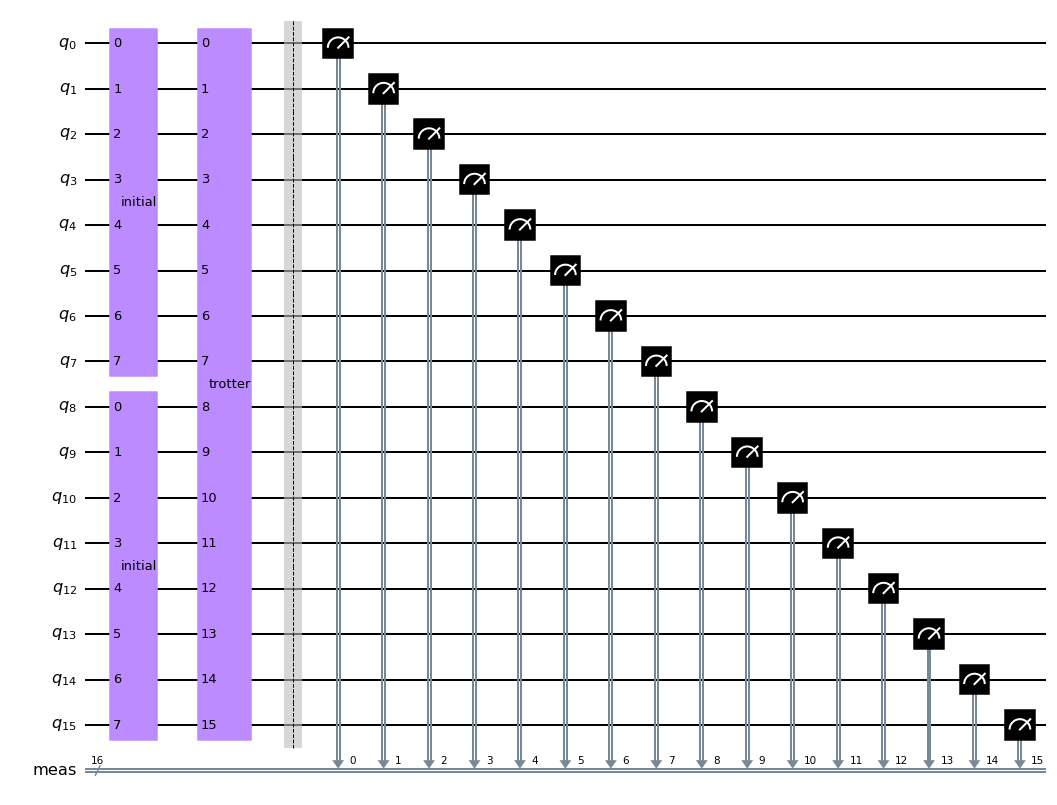

In [5]:
def InitialPreparation(qc=QuantumCircuit(8), c=0):
    qc.x(c)
    qc.x(c + 1)
    
    for i in range(c, c + 5):
        qc.append(getGGate(), [i + 1, i + 2])
        qc.append(getGGate(), [i, i + 1])
    
    # for i in range(0, 5):
    #     qc.append(getGGate(), [i + 1 + c, i + 2 + c])
    #     qc.append(getGGate(), [i + c, i + 1 + c])
    
    return qc.to_instruction(label="initial")
    
def TrotterStep(qc=QuantumCircuit(16), c=0):
    
    for i in range(0, 15, 2):
        qc.append(getKGate(), [i, i+1])
        
    for i in range(0, 7, 2):
        qc.cp(math.pi / 4, control_qubit=i, target_qubit=i+c)
    
    for i in range(1, 6, 2):
        qc.iswap(i, i + 1)
        
    for i in range(1 + c, 6 + c, 2):
        qc.iswap(i, i + 1)
    
    for i in range(2, 7, 2):
        qc.cp(math.pi / 4, control_qubit=i, target_qubit=i+c)
    
    qc.cp(math.pi / 4, control_qubit=7, target_qubit=7+c)
    
    for i in range(1, 6, 2):
        qc.append(getKGate(), [i, i+1])
        
    for i in range(1 + c, 6 + c, 2):
        qc.append(getKGate(), [i, i+1])
    
    return qc.to_instruction(label="trotter")
        
new_model = QuantumCircuit(16)
new_model.append(InitialPreparation(), list(range(0, 8)))
new_model.append(InitialPreparation(), list(range(8, 16)))
new_model.append(TrotterStep(c=8), list(range(0, 16)))
new_model.measure_all()
# new_model.append(TrotterStep(c=8), list(range(0, 16)))

new_model.draw(output="mpl")

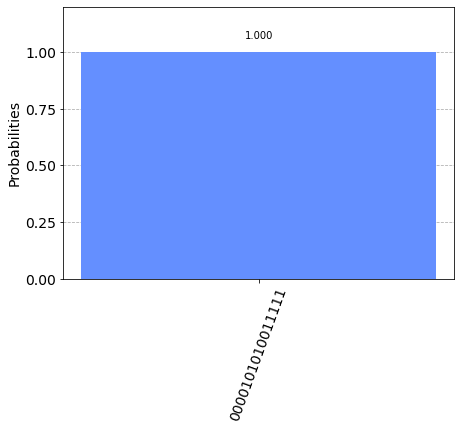

In [6]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend("ibmq_qasm_simulator")

counts = execute(new_model, device).result().get_counts()
plot_histogram(counts)